In [43]:
# https://www.geeksforgeeks.org/deep-learning/implementing-an-autoencoder-in-pytorch/

import torch
from torch import nn, optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

from ViT import ViTEncoder, ViTDecoder, AutoEncoder

In [45]:
transform = transforms.Compose([
    transforms.ToTensor(), 
])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [46]:
autoencoder = AutoEncoder(img_size=28, patch_size=4, num_of_channels=1, 
                     embed_dim=16, enc_depth=4, dec_depth=2, num_heads=2, mlp_dim=64)      

Reconstructed Shape: torch.Size([8, 1, 28, 28])


In [47]:
loss_function = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3, weight_decay=1e-8)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

epochs = 20
outputs = []
losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder.to(device)
autoencoder.train()

for epoch in range(epochs):
    for images, _ in loader:
        running_loss = 0.0
        images = images.to(device)
        
        reconstructed = autoencoder(images)
        loss = loss_function(reconstructed, images)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(loader)
    losses.append(avg_loss)
    
    outputs.append((epoch, images, reconstructed))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss.item():.6f}")


Epoch 1/20, Loss: 0.002248
Epoch 2/20, Loss: 0.000883
Epoch 3/20, Loss: 0.000586
Epoch 4/20, Loss: 0.000525
Epoch 5/20, Loss: 0.000417
Epoch 6/20, Loss: 0.000383
Epoch 7/20, Loss: 0.000345
Epoch 8/20, Loss: 0.000427
Epoch 9/20, Loss: 0.000308


KeyboardInterrupt: 

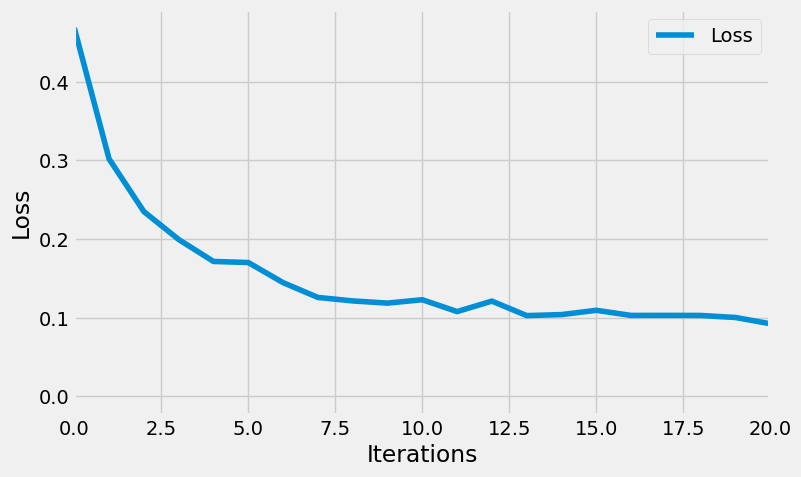

In [54]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.xlim([0, epochs])
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
type(dataset[0])

tuple

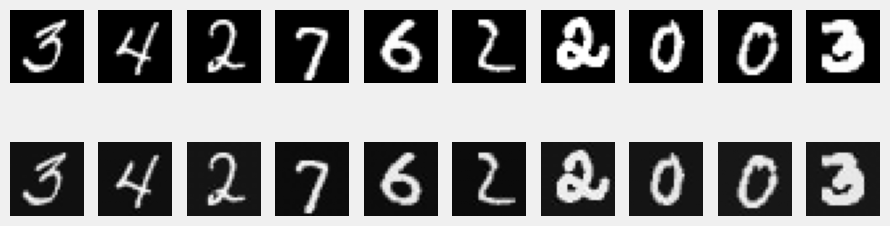

In [53]:
autoencoder.eval()
dataiter = iter(loader)
images, _ = next(dataiter)

images = images.to(device)
reconstructed = autoencoder(images)

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for i in range(10):
    axes[0, i].imshow(images[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.show()